In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import math

In [2]:
fv = pd.read_csv('../../Data/feature_vector.csv')
fv.head()

,index,sequence_label,source,generator,chisqr_p,chisqr_X2.X-squared,chisqr_df.df,ks_p,ks_D.D,freq_p,...,gap_p,gap_X2.X-squared,gap_df.df,serial_autocorrelation,perm_observed_stat,perm_p,entropy_val,fft_dominant_frequency,fft_dominant_period,fft_max_magnitude
0,1,randoms-1,QRNG,IBM Qiskit (Single-Qubit),0.000005,41.24,9,4.015142e-05,0.104000,0.000005,...,5.973983e-108,634.069388,40,0.062339,4.854,1.0,3.271215,0.096,10.416667,175.438884
1,2,randoms-10,QRNG,IBM Qiskit (Single-Qubit),0.000010,39.24,9,1.988713e-04,0.096000,0.000010,...,6.612279e-138,789.232653,43,-0.042322,5.050,1.0,3.272462,0.338,2.958580,181.936266
2,3,randoms-100,PRNG,Linear Congruential Generator (LCG),0.989425,2.12,9,9.079986e-05,0.100000,0.989425,...,3.376871e-161,825.600000,21,-0.065012,5.592,1.0,3.318868,0.500,2.000000,196.000000
3,4,randoms-101,PRNG,XORShift,0.337688,10.16,9,4.200665e-07,0.124000,0.337688,...,4.409093e-129,746.310204,43,0.059702,5.282,1.0,3.307208,0.054,18.518519,162.277093
4,5,randoms-102,PRNG,XORShift,0.040108,17.60,9,1.240019e-06,0.119556,0.040108,...,4.211260e-112,657.371429,41,0.013732,5.748,1.0,3.297016,0.338,2.958580,187.311277


In [3]:
feature_cols = fv.columns[4:].tolist()
features = fv[feature_cols]

In [4]:
features.isnull().sum()

chisqr_p                  0
chisqr_X2.X-squared       0
chisqr_df.df              0
ks_p                      0
ks_D.D                    0
freq_p                    0
freq_X2.X-squared         0
freq_df.df                0
eqdist_empiricalMean      0
eqdist_diff               0
gap_p                     0
gap_X2.X-squared          0
gap_df.df                 0
serial_autocorrelation    0
perm_observed_stat        0
perm_p                    0
entropy_val               0
fft_dominant_frequency    0
fft_dominant_period       0
fft_max_magnitude         0
dtype: int64

In [5]:
features.dtypes

chisqr_p                  float64
chisqr_X2.X-squared       float64
chisqr_df.df                int64
ks_p                      float64
ks_D.D                    float64
freq_p                    float64
freq_X2.X-squared         float64
freq_df.df                  int64
eqdist_empiricalMean      float64
eqdist_diff               float64
gap_p                     float64
gap_X2.X-squared          float64
gap_df.df                   int64
serial_autocorrelation    float64
perm_observed_stat        float64
perm_p                    float64
entropy_val               float64
fft_dominant_frequency    float64
fft_dominant_period       float64
fft_max_magnitude         float64
dtype: object

In [6]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [7]:
pca = PCA()
pca_result = pca.fit_transform(features_scaled)

In [8]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
loadings = pca.components_.T

In [9]:
loadings_df = pd.DataFrame(loadings, index=feature_cols, columns=[f'PC{i+1}' for i in range(len(feature_cols))])
loadings_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
chisqr_p,3.629785e-01,-0.068262,2.393615e-02,-2.548931e-01,5.662447e-02,-2.302974e-02,-2.132984e-02,-4.678955e-02,1.177694e-01,1.849695e-01,-3.962388e-01,2.358703e-01,-1.488481e-01,9.065480e-02,-1.654862e-02,-1.706900e-02,-2.051334e-01,6.572963e-01,-5.684274e-02,1.505018e-01
chisqr_X2.X-squared,-3.836401e-01,0.158112,1.750538e-02,-7.888094e-02,-6.687245e-02,6.687587e-02,-1.325298e-01,-3.744061e-02,9.196101e-02,1.381266e-02,-2.093426e-01,1.699527e-01,-5.359972e-02,-4.123600e-02,2.124356e-01,4.028944e-01,-6.740051e-01,-2.032165e-01,-4.561037e-02,-4.837217e-02
chisqr_df.df,2.775558e-17,0.000000,-9.714451e-17,1.110223e-16,1.110223e-16,2.081668e-17,1.387779e-17,5.551115e-17,-1.387779e-16,5.551115e-17,-3.053113e-16,-1.110223e-16,2.359224e-16,2.688821e-17,2.411266e-16,-2.949030e-16,-8.411145e-02,8.677176e-02,9.852066e-01,-1.215067e-01
ks_p,-6.401399e-02,-0.224977,-4.886677e-01,1.150674e-01,6.833381e-02,-5.532600e-02,1.333128e-01,2.538886e-01,-4.414265e-01,-1.374555e-01,-2.379437e-01,3.944335e-01,4.033015e-01,1.070037e-01,5.612308e-02,9.530883e-03,-8.985125e-17,2.584561e-17,1.457524e-17,1.800068e-16
ks_D.D,5.994006e-02,0.144634,5.549918e-01,-1.262771e-02,1.040122e-01,-2.631317e-01,-3.058800e-01,-6.833773e-02,2.135265e-03,-2.483336e-01,-1.258613e-01,1.227006e-01,5.986832e-01,3.074911e-02,-1.925544e-01,2.895233e-03,1.753277e-17,4.065815e-17,1.122940e-16,-1.484235e-16


In [10]:
print("Explained Variance Ratio per PC:")
for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.4f} ({cumulative_variance[i]:.4f} cumulative)")

print("\nPCA Loadings (features' contributions to each PC):")
print(loadings_df)

Explained Variance Ratio per PC:
PC1: 0.3289 (0.3289 cumulative)
PC2: 0.1215 (0.4504 cumulative)
PC3: 0.1105 (0.5609 cumulative)
PC4: 0.0708 (0.6317 cumulative)
PC5: 0.0699 (0.7015 cumulative)
PC6: 0.0540 (0.7556 cumulative)
PC7: 0.0497 (0.8053 cumulative)
PC8: 0.0467 (0.8520 cumulative)
PC9: 0.0454 (0.8973 cumulative)
PC10: 0.0317 (0.9290 cumulative)
PC11: 0.0217 (0.9507 cumulative)
PC12: 0.0192 (0.9698 cumulative)
PC13: 0.0159 (0.9857 cumulative)
PC14: 0.0104 (0.9960 cumulative)
PC15: 0.0038 (0.9999 cumulative)
PC16: 0.0001 (1.0000 cumulative)
PC17: 0.0000 (1.0000 cumulative)
PC18: 0.0000 (1.0000 cumulative)
PC19: 0.0000 (1.0000 cumulative)
PC20: 0.0000 (1.0000 cumulative)

PCA Loadings (features' contributions to each PC):
                                 PC1           PC2           PC3  \
chisqr_p                3.629785e-01 -6.826222e-02  2.393615e-02   
chisqr_X2.X-squared    -3.836401e-01  1.581119e-01  1.750538e-02   
chisqr_df.df            2.775558e-17  0.000000e+00 -9.714451

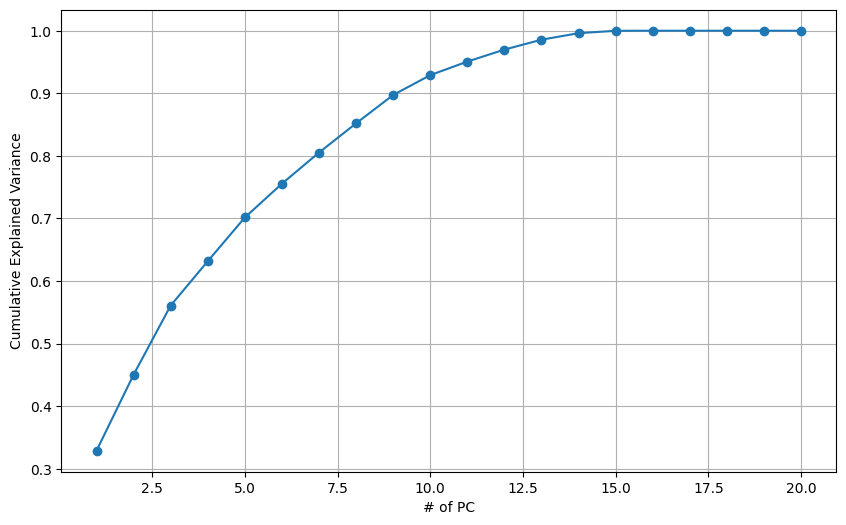

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, marker='o')
plt.xlabel("# of PC")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

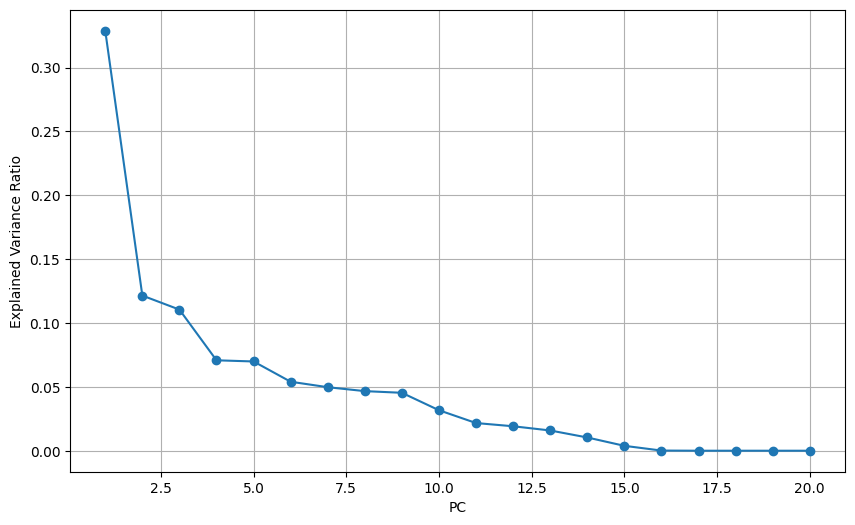

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o')
plt.xlabel("PC")
plt.ylabel("Explained Variance Ratio")
plt.grid(True)
plt.show()

In [13]:
# loadings_df.to_csv("pca_loadings.csv")
# np.savetxt("pca_explained_variance.csv", explained_variance, delimiter=",")
# np.savetxt("pca_transformed.csv", pca_result, delimiter=",")

In [14]:
labels = fv[['source', 'generator']]

In [15]:
pca_transformed = pd.read_csv("pca_transformed.csv", header=None)
pca_df = pd.DataFrame(pca_transformed.values, columns=[f'PC{i+1}' for i in range(pca_transformed.shape[1])])

combined_df = pd.concat([labels, pca_df[['PC1', 'PC2']]], axis=1)

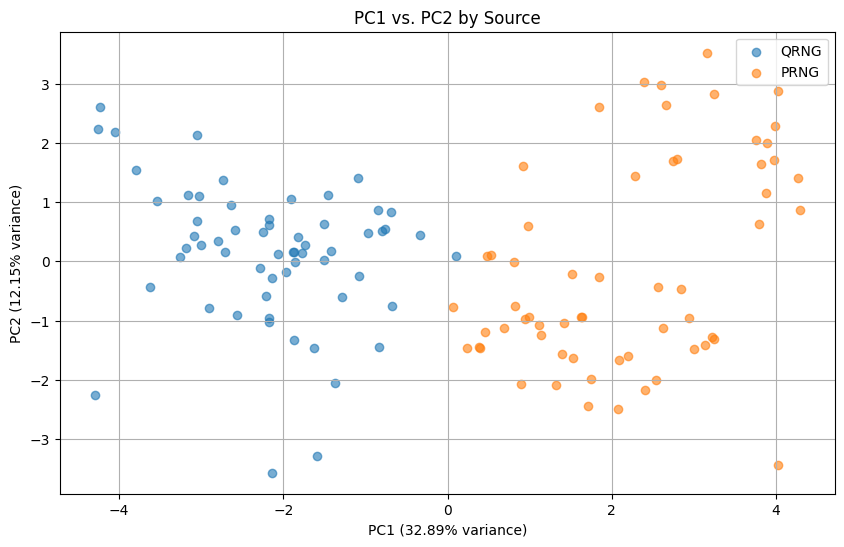

In [16]:
plt.figure(figsize=(10, 6))
for source in combined_df['source'].unique():
    subset = combined_df[combined_df['source'] == source]
    plt.scatter(subset['PC1'], subset['PC2'], label=source, alpha=0.6)
plt.title("PC1 vs. PC2 by Source")
plt.xlabel("PC1 (32.89% variance)")
plt.ylabel("PC2 (12.15% variance)")
plt.legend()
plt.grid(True)
plt.show()

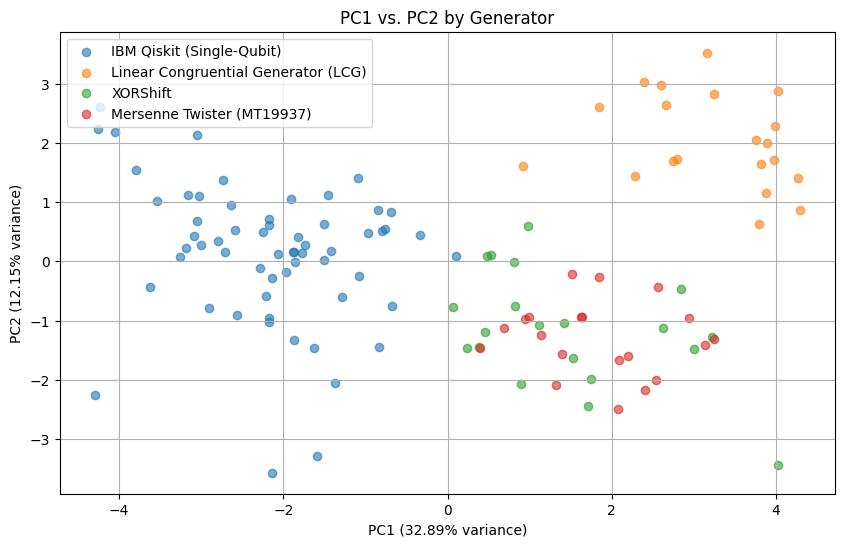

In [17]:
plt.figure(figsize=(10, 6))
for generator in combined_df['generator'].unique():
    subset = combined_df[combined_df['generator'] == generator]
    plt.scatter(subset['PC1'], subset['PC2'], label=generator, alpha=0.6)
plt.title("PC1 vs. PC2 by Generator")
plt.xlabel("PC1 (32.89% variance)")
plt.ylabel("PC2 (12.15% variance)")
plt.legend()
plt.grid(True)
plt.show()

In [18]:
loadings_df = pd.read_csv("pca_loadings.csv", index_col=0)

test_categories = {
    'Chi-Squared': ['chisqr_p', 'chisqr_X2.X-squared', 'chisqr_df.df'],
    'KS': ['ks_p', 'ks_D.D'],
    'Frequency': ['freq_p', 'freq_X2.X-squared', 'freq_df.df'],
    'Equidistribution': ['eqdist_empiricalMean', 'eqdist_diff'],
    'Gap': ['gap_p', 'gap_X2.X-squared', 'gap_df.df'],
    'Serial': ['serial_autocorrelation'],
    'Permutation': ['perm_observed_stat', 'perm_p'],
    'Entropy': ['entropy_val'],
    'FFT': ['fft_dominant_frequency', 'fft_dominant_period', 'fft_max_magnitude']
}

In [19]:
def plot_spider_chart(pcs, title):
    category_scores = {}
    for test, features in test_categories.items():
        score = np.mean(np.abs(loadings_df.loc[features, pcs].values))
        category_scores[test] = score

    categories = list(category_scores.keys())
    values = list(category_scores.values())
    values += values[:1]

    N = len(categories)
    angles = [n / float(N) * 2 * math.pi for n in range(N)]
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    ax.fill(angles, values, color='blue', alpha=0.25)
    ax.plot(angles, values, color='blue', linewidth=2)
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=10)
    plt.title(title, size=14, pad=20)
    plt.show()

    print(f"\nAverage Absolute Loadings per Test ({pcs[0]}-{pcs[-1]}):")
    for test, score in category_scores.items():
        print(f"{test}: {score:.4f}")

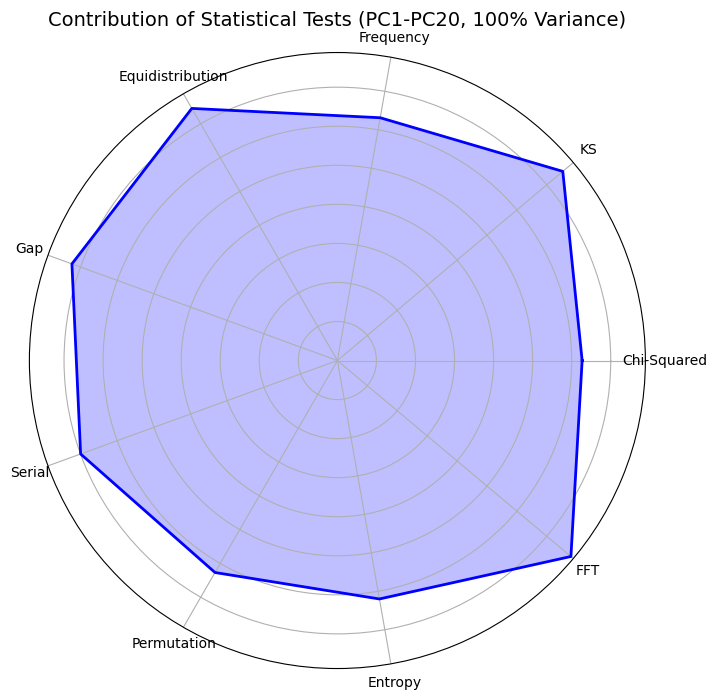


Average Absolute Loadings per Test (PC1-PC20):
Chi-Squared: 0.1254
KS: 0.1507
Frequency: 0.1263
Equidistribution: 0.1491
Gap: 0.1447
Serial: 0.1399
Permutation: 0.1254
Entropy: 0.1240
FFT: 0.1561


In [20]:
plot_spider_chart([f'PC{i+1}' for i in range(20)], "Contribution of Statistical Tests (PC1-PC20, 100% Variance)")

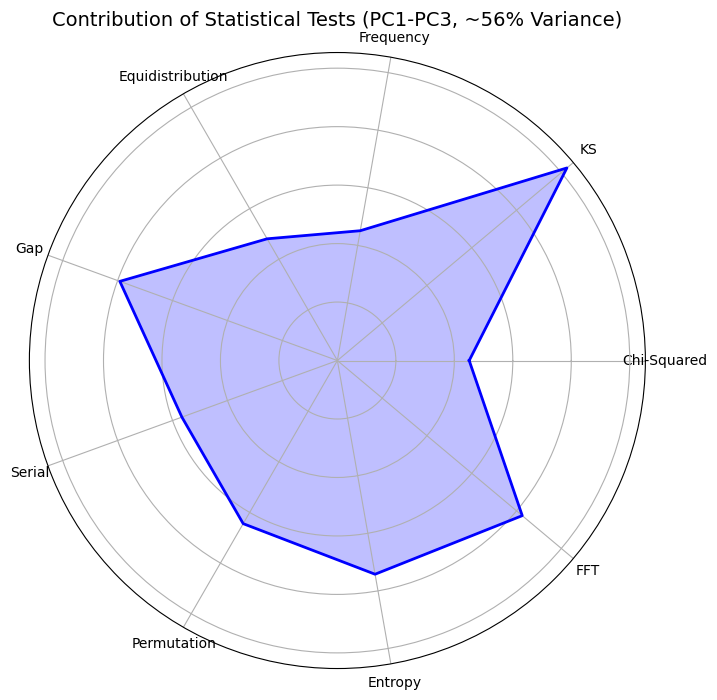


Average Absolute Loadings per Test (PC1-PC3):
Chi-Squared: 0.1127
KS: 0.2562
Frequency: 0.1127
Equidistribution: 0.1202
Gap: 0.1980
Serial: 0.1415
Permutation: 0.1611
Entropy: 0.1856
FFT: 0.2064


In [21]:
plot_spider_chart(['PC1', 'PC2', 'PC3'], "Contribution of Statistical Tests (PC1-PC3, ~56% Variance)")